# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'x1', 'x2', 'y'], dtype='object')

In [4]:
data  = data.drop(["Unnamed: 0"], axis=1)

In [5]:
data.shape

(300, 3)

In [6]:
X, y = data[["x1","x2"]], data["y"]

In [7]:
def plot_data(X):
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='pink', s=50, edgecolors='k')
    plt.title("Unclustered Data")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

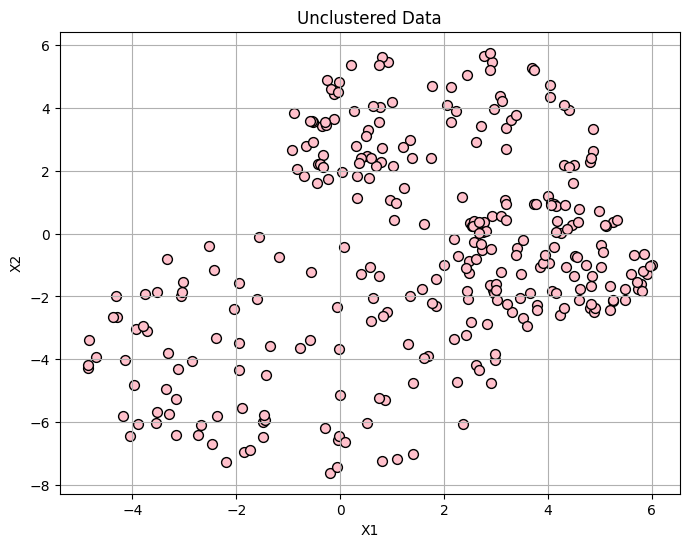

In [8]:
plot_data(X)

# Model

In [9]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self,X):
        X = np.array(X)
        random_index = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group,self.centroids

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

    def predict(self, X):
        if self.centroids is None:
            raise RuntimeError("The model has not been fitted yet. Call fit() first.")
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)
            
        return self.assign_clusters(X)

# Plot Clusters

In [11]:
model = KMeans(n_clusters=3, max_iter=500)
cluster_groups, centroids = model.fit(X)

In [12]:
centroids

array([[ 1.15578274,  3.39932212],
       [ 3.71399023, -0.87930909],
       [-1.73965224, -4.31983167]])

In [13]:
def plot_kmeans_clusters(X, labels, centroids=None):
    X = np.array(X)
    plt.figure(figsize=(8, 6))
    
    unique_labels = np.unique(labels)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    for i, label in enumerate(unique_labels):
        cluster_points = X[labels == label]
        
        plt.scatter(
            cluster_points[:, 0], 
            cluster_points[:, 1], 
            color=colors[i % len(colors)], 
            label=f'Cluster {label}'
        )

    if centroids is not None:
        plt.scatter(
            centroids[:, 0], 
            centroids[:, 1], 
            s=100,             
            marker='X',          
            c='black',           
            edgecolor='white',  
            label='Centroids'
        )

    plt.title('K-Means Clustering Results')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

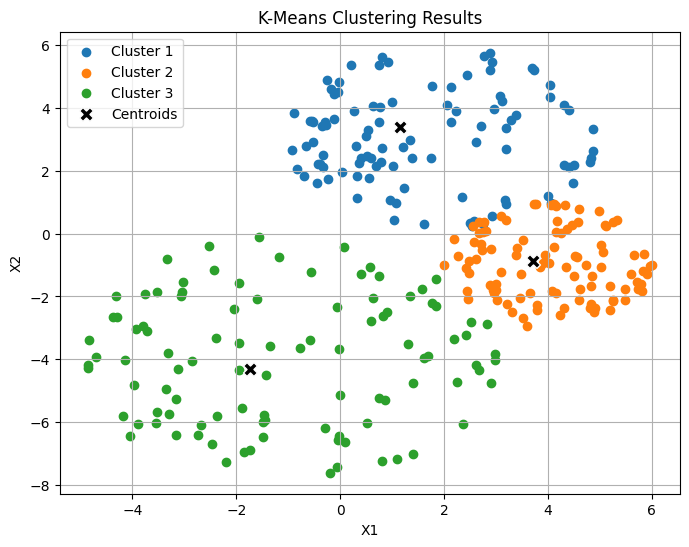

In [14]:
plot_kmeans_clusters(X, y, centroids)

# Dataset 2

In [15]:
data2 = pd.read_csv("Dataset_2.csv")
print("Shape of dataset 2 = ", data2.shape)

data2 = data2.drop("Unnamed: 0", axis=1)
print("Shape of dataset 2 after dropping column = ", data2.shape)

Shape of dataset 2 =  (700, 4)
Shape of dataset 2 after dropping column =  (700, 3)


In [22]:
model2 = KMeans(n_clusters=2, max_iter=300)
cluster_groups2, centroids2 = model2.fit(data2[['x1','x2']])

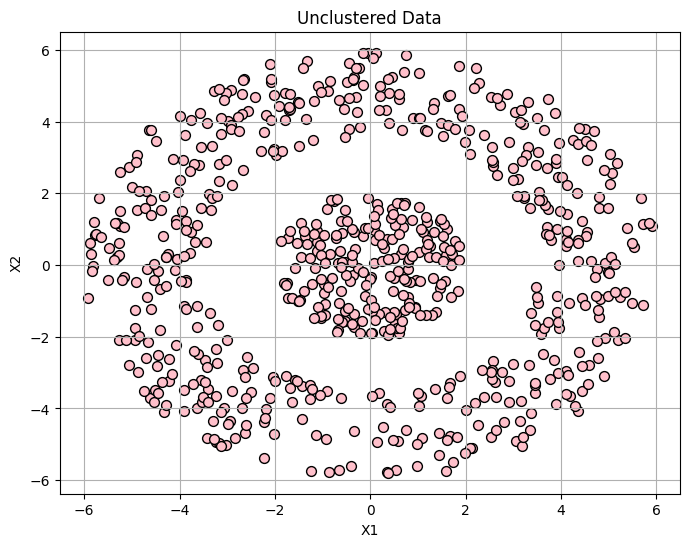

In [23]:
plot_data(data2[['x1','x2']])

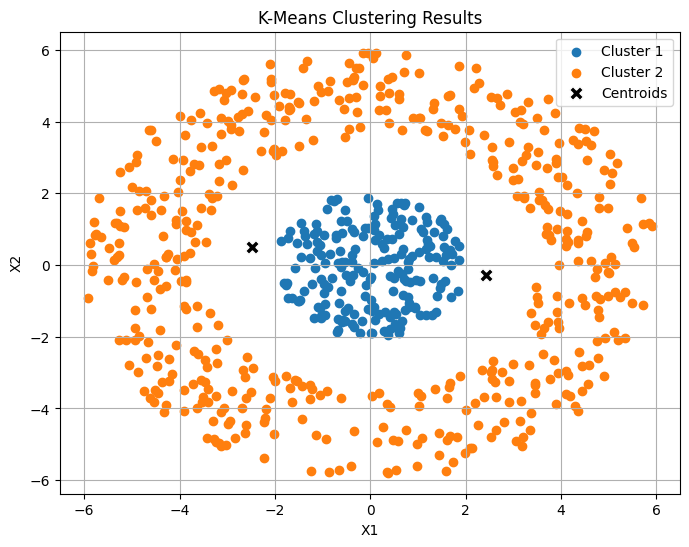

In [24]:
plot_kmeans_clusters(data2[['x1','x2']], data2['y'], centroids2)